In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

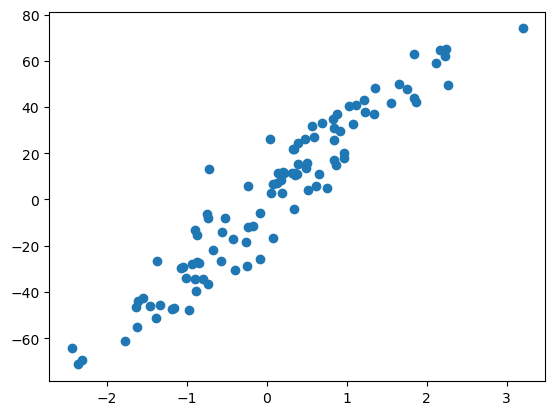

In [2]:
x, y = make_regression(n_samples = 100, n_features = 2, noise = 10)
plt.scatter(x[:, 0], y)

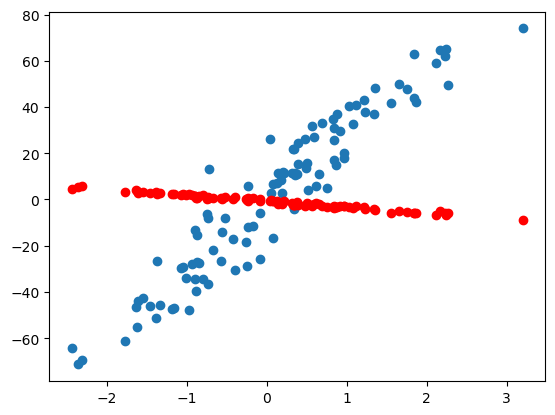

In [4]:
y = y.reshape(y.shape[0], 1)
X = np.hstack((x, np.ones((x.shape[0], 1))))
theta = np.random.randn(X.shape[1], 1)
def model(X, theta):
    return X.dot(theta)

plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], model(X, theta), c = 'r')

In [5]:
def cost_function(X, y, theta):
    m = len(y)
    return  1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)

def grad(X, y, theta):
    m = len(y)
    return  1 / m * X.T.dot(model(X, theta) - y)

def gradien_descent(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

In [6]:
theta_final = gradien_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)
theta_final

array([[29.08741063],
       [ 2.73668962],
       [-0.93111294]])

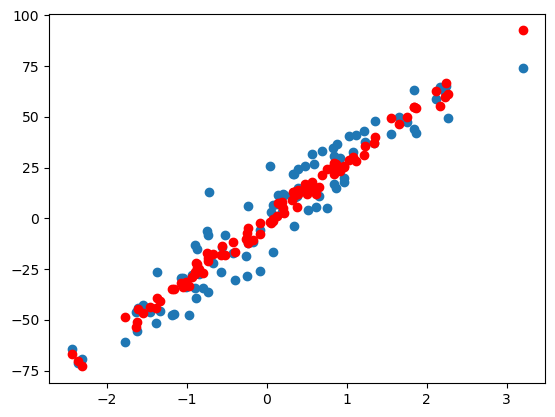

In [9]:
prediction = model(X, theta_final)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c = 'r')

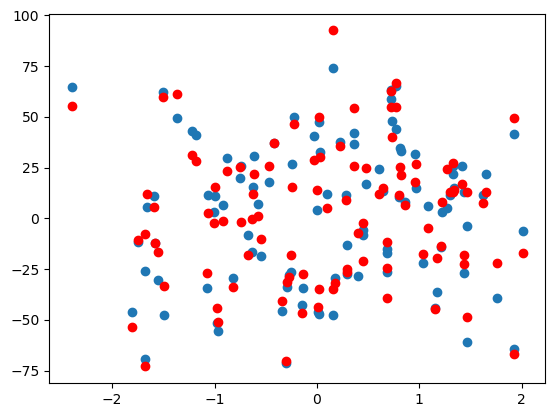

In [10]:
prediction = model(X, theta_final)
plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], prediction, c = 'r')

In [11]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

coef_determination(y, prediction)

0.9174380138678946